In [1]:
import pandas as pd 
import numpy as np 

In [2]:
# df_sample = pd.read_csv('Txn_data.csv') 
chunksize = 500000
chunks = pd.read_csv('E:/2025/ExtensoData_Internship_Work/Projects/task4/datasets/Txn_data.csv', dtype={2: str, 3: str}, chunksize=chunksize)

first_chunk = next(chunks)
print(first_chunk.head())

   Unnamed: 0            Date/Time From_Account_id To_Account_id   amount
0           0  2024-06-15 00:00:02         9410161       1191872   1000.0
1           1  2024-06-15 00:00:02         9781224       5590231  10000.0
2           2  2024-06-15 00:00:02         4231628       2677870    140.0
3           3  2024-06-15 00:00:05         1339396        869200   1000.0
4           4  2024-06-15 00:00:07         3531317       9053549   5000.0


In [3]:
print(first_chunk.dtypes)
print(first_chunk.describe())

Unnamed: 0           int64
Date/Time           object
From_Account_id     object
To_Account_id       object
amount             float64
dtype: object
          Unnamed: 0        amount
count  500000.000000  5.000000e+05
mean   249999.500010  1.464272e+03
std    144337.711652  9.527104e+03
min         0.000000  1.000000e+00
25%    124999.750000  1.200000e+02
50%    249999.500000  4.000000e+02
75%    374999.250000  1.195000e+03
max    500000.000000  6.359084e+06


In [4]:
first_chunk['Date/Time'] = pd.to_datetime(first_chunk['Date/Time'])
first_chunk['From_Account_id'] = first_chunk['From_Account_id'].astype(str)
first_chunk['To_Account_id'] = first_chunk['To_Account_id'].astype(str)
print(first_chunk.columns)

Index(['Unnamed: 0', 'Date/Time', 'From_Account_id', 'To_Account_id',
       'amount'],
      dtype='object')


In [5]:
print(first_chunk.dtypes)

Unnamed: 0                  int64
Date/Time          datetime64[ns]
From_Account_id            object
To_Account_id              object
amount                    float64
dtype: object


In [6]:
first_chunk.rename(columns={'Unnamed: 0': 'Txn_number'}, inplace=True)

In [7]:
first_chunk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Txn_number       500000 non-null  int64         
 1   Date/Time        500000 non-null  datetime64[ns]
 2   From_Account_id  500000 non-null  object        
 3   To_Account_id    500000 non-null  object        
 4   amount           500000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 19.1+ MB


In [8]:
print(first_chunk.isnull().sum())


Txn_number         0
Date/Time          0
From_Account_id    0
To_Account_id      0
amount             0
dtype: int64


In [9]:
print(first_chunk.duplicated().sum())

0


<Axes: xlabel='Hour'>

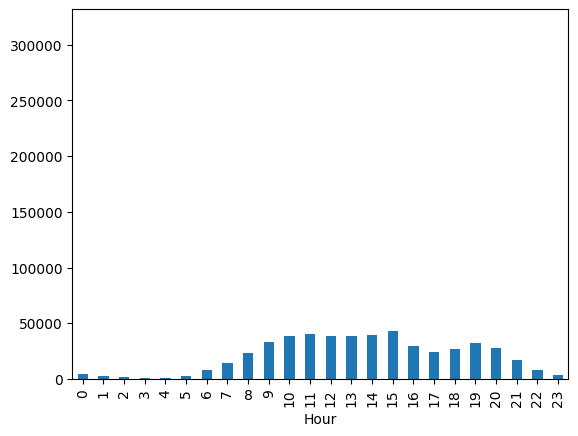

In [10]:
first_chunk['Date'] = first_chunk['Date/Time'].dt.date
first_chunk['Month'] = first_chunk['Date/Time'].dt.month
first_chunk['Hour'] = first_chunk['Date/Time'].dt.hour

first_chunk.groupby('Date').size().plot()
first_chunk['Hour'].value_counts().sort_index().plot(kind='bar')

First chunk Time based analysis


1. Time range
2. Transactions per day
3. Total and average transaction amount per day
4. Transactions by day of week and hour
Visualize transactions by hour for each day
5. Check for missing timestamps or duplicates

In [11]:
start_time = first_chunk['Date/Time'].min()
end_time = first_chunk['Date/Time'].max()
print(f'Time range in first chunk : {start_time} to {end_time}')


Time range in first chunk : 2024-06-15 00:00:02 to 2024-06-16 16:19:48


In [12]:
transactions_per_day = first_chunk.groupby(first_chunk['Date/Time'].dt.date).size()
print("Transactions per day:")
print(transactions_per_day.head())

Transactions per day:
Date/Time
2024-06-15    315869
2024-06-16    184131
dtype: int64


In [13]:
daily_amount = first_chunk.groupby(first_chunk['Date/Time'].dt.date)['amount'].agg(['sum','mean'])
print("Daily transaction amount summary:")
print(daily_amount.head())

Daily transaction amount summary:
                     sum         mean
Date/Time                            
2024-06-15  3.998166e+08  1265.767071
2024-06-16  3.323194e+08  1804.798961


In [14]:
first_chunk['day_of_week'] = first_chunk['Date/Time'].dt.day_name()
first_chunk['hour_of_day'] = first_chunk['Date/Time'].dt.hour
pd.set_option('display.max_columns', None)

transactions_by_day_hour = first_chunk.groupby(['day_of_week', 'hour_of_day']).size().unstack(fill_value=0)
print("Transactions by day of week and hour:")
print(transactions_by_day_hour.head())

Transactions by day of week and hour:
hour_of_day    0     1     2    3    4     5     6     7      8      9   \
day_of_week                                                               
Saturday     2536  1418  1008  797  778  1669  3888  7154  10938  16496   
Sunday       1812   967   634  472  510  1286  3811  7398  12303  16531   

hour_of_day     10     11     12     13     14     15     16     17     18  \
day_of_week                                                                  
Saturday     17957  18384  17582  17044  17635  19361  21762  23793  26629   
Sunday       20744  21649  21402  21311  21899  23360   8042      0      0   

hour_of_day     19     20     21    22    23  
day_of_week                                   
Saturday     31947  28131  16903  8260  3799  
Sunday           0      0      0     0     0  


In [15]:
transactions_by_day = transactions_by_day_hour.sum(axis=1) #adds across columns
transactions_by_hour = transactions_by_day_hour.sum(axis=0) #adds across rows

day_max = transactions_by_day.idxmax()
max_value_day = transactions_by_day.max()

day_min = transactions_by_day.idxmin()
min_value_day = transactions_by_day.min()

print(f" Max transactions on : {day_max} ({max_value_day} transactions)")
print(f" Min transactions on: {day_min} ({min_value_day} transactions)")

hour_max = transactions_by_hour.idxmax()
max_value_hour = transactions_by_hour.max()

hour_min = transactions_by_hour.idxmin()
min_value_hour = transactions_by_hour.min()

print(f"Max transactions at hour: {hour_max}:00 ({max_value_hour} transactios)")
print(f"Min transactions at hour: {hour_min}:00 ({min_value_hour} transactions)")

 Max transactions on : Saturday (315869 transactions)
 Min transactions on: Sunday (184131 transactions)
Max transactions at hour: 15:00 (42721 transactios)
Min transactions at hour: 3:00 (1269 transactions)


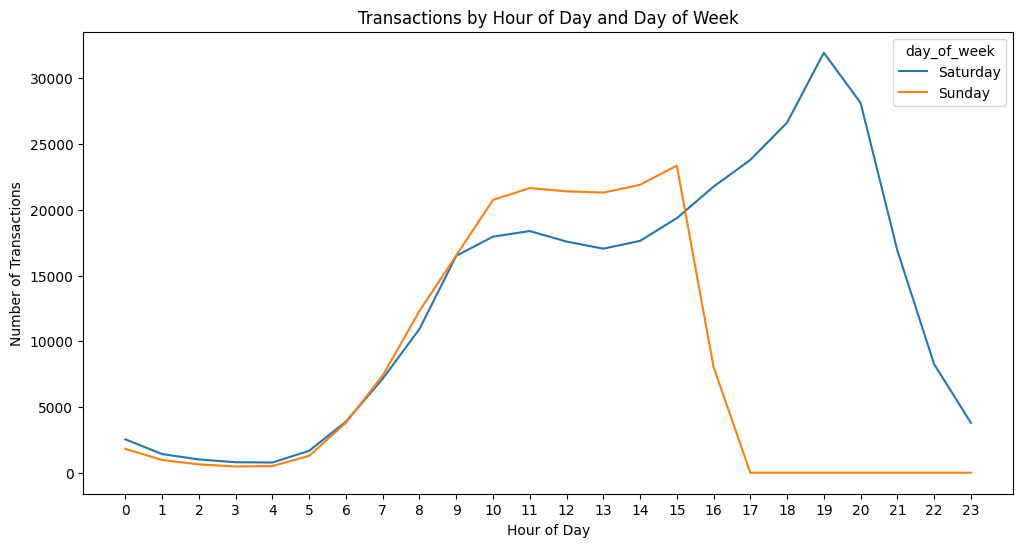

In [16]:
import matplotlib.pyplot as plt 
ax = transactions_by_day_hour.T.plot(figsize=(12,6))
plt.title("Transactions by Hour of Day and Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")

ax.set_xticks(range(24))
ax.set_xticklabels([str(i) for i in range(24)])
plt.show()

In [17]:
missing_dates = first_chunk['Date/Time'].isnull().sum()
duplicate_rows = first_chunk.duplicated().sum()
print(f"Missing timestamps: {missing_dates}")
print(f"Duplicate rows: {duplicate_rows}")

Missing timestamps: 0
Duplicate rows: 0


First chunk: Transaction Amount Analysis
1. What is the overall distribution of transaction amounts ?
(Summary statistics and histogram)
2. Are there any outliers or extreme values?
(Boxplot and quantiles)
3. What is the total and average transaction amount?
4. How does the transaction amount vary over time?
(Daily or hourly aggregates)
5. Are there differences in amounts by transaction direction?
(From_Account_id vs To_Account_id patterns if relevant)

count     500,000.00
mean        1,464.27
std         9,527.10
min             1.00
25%           120.00
50%           400.00
75%         1,195.00
max     6,359,084.00
Name: amount, dtype: float64


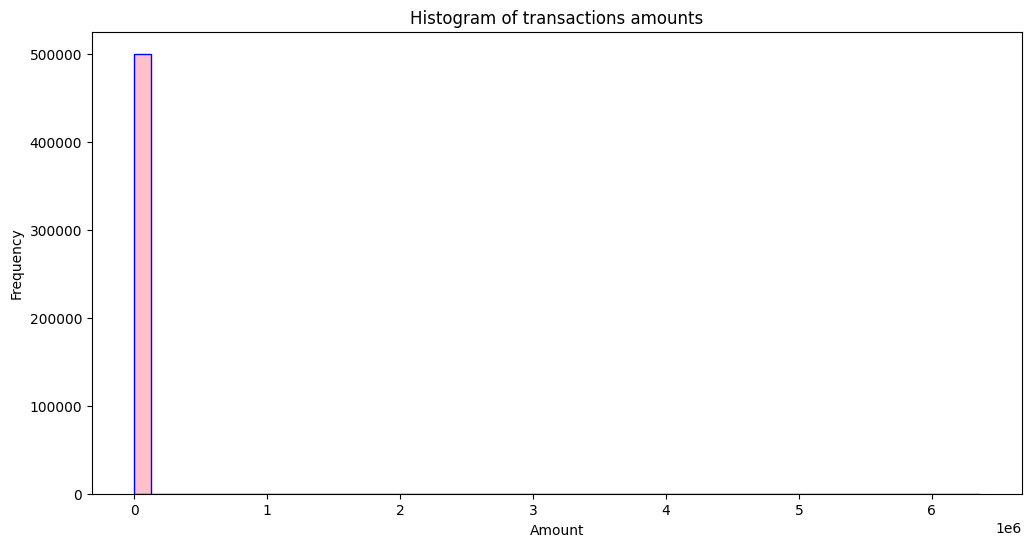

In [18]:
#1. Overal distribution
pd.set_option('display.float_format', '{:,.2f}'.format)
amount_stats = first_chunk['amount'].describe()
print(amount_stats)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.hist(first_chunk['amount'], color='pink',edgecolor='blue', bins=50)
plt.title("Histogram of transactions amounts")
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

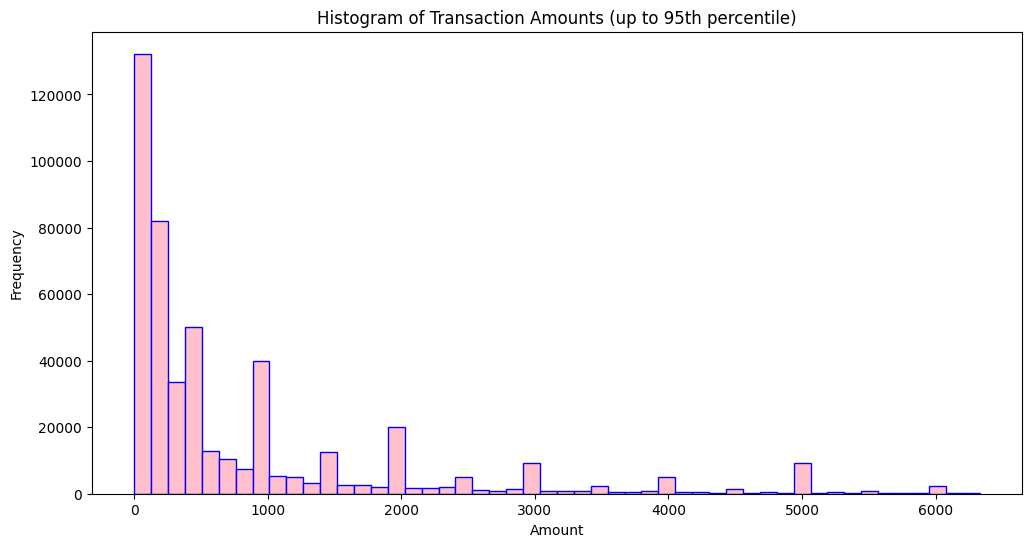

In [19]:
import matplotlib.pyplot as plt

# Optional: compute 95th percentile to cap the range
cap = first_chunk['amount'].quantile(0.95)

# Filter the data to exclude extreme outliers
filtered_amounts = first_chunk[first_chunk['amount'] <= cap]['amount']

plt.figure(figsize=(12, 6))
plt.hist(filtered_amounts, bins=50, color='pink', edgecolor='blue')
plt.title("Histogram of Transaction Amounts (up to 95th percentile)")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


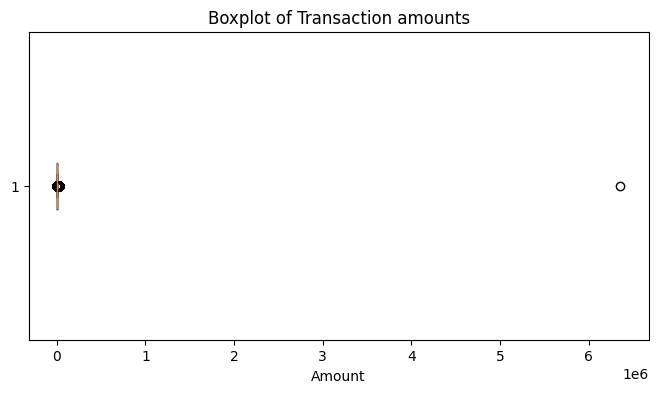

In [20]:
plt.figure(figsize=(8,4))
plt.boxplot(first_chunk['amount'], vert=False)
plt.title("Boxplot of Transaction amounts")
plt.xlabel('Amount')
plt.show()

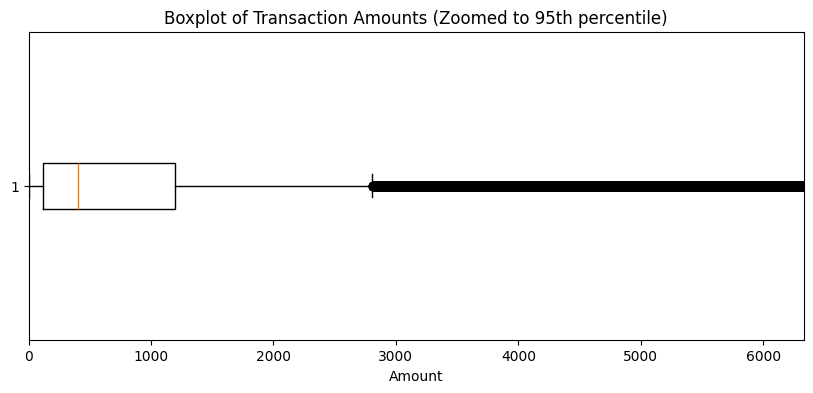

In [21]:
import matplotlib.pyplot as plt

# Set a cap on the x-axis at the 95th percentile
cap = first_chunk['amount'].quantile(0.95)

plt.figure(figsize=(10, 4))
plt.boxplot(first_chunk['amount'], vert=False)
plt.xlim(0, cap)  # Limit x-axis
plt.title("Boxplot of Transaction Amounts (Zoomed to 95th percentile)")
plt.xlabel("Amount")
plt.show()


In [22]:
#total and average transaction amount overall
total_amount = first_chunk['amount'].sum()
average_amount = first_chunk["amount"].mean()
print(f"Total transaction amount: {total_amount}")
print(f"Average transaction amount: {average_amount}")

Total transaction amount: 732136016.64
Average transaction amount: 1464.27203328


In [23]:
#transaction amount over time 
daily_amount = first_chunk.groupby(first_chunk['Date/Time'].dt.date)['amount'].agg(['sum','mean'])
print("Daily transaction amount summary:")
print(daily_amount.head())

Daily transaction amount summary:
                      sum     mean
Date/Time                         
2024-06-15 399,816,579.10 1,265.77
2024-06-16 332,319,437.54 1,804.80


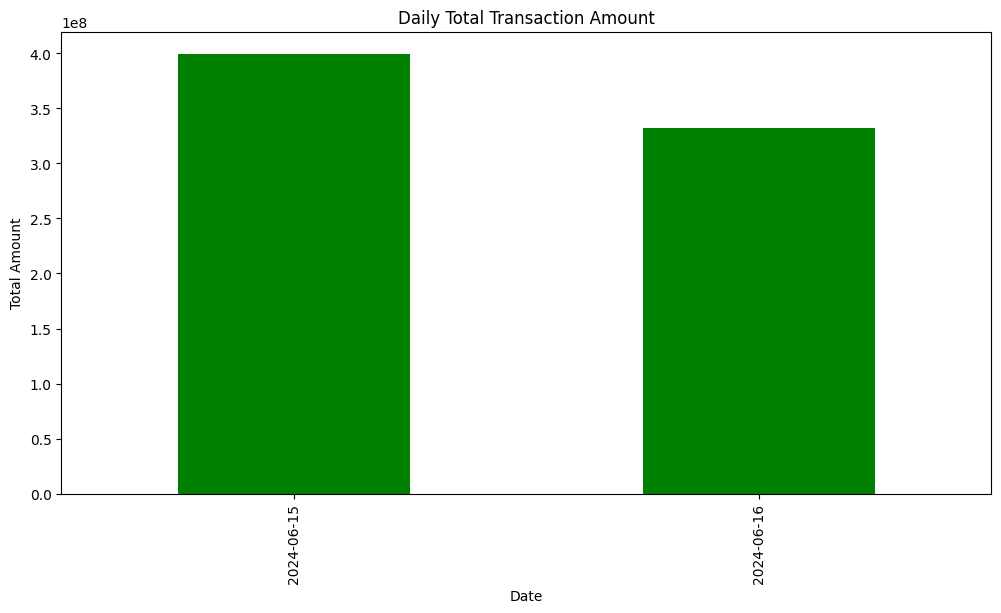

In [24]:
daily_amount['sum'].plot(kind='bar', figsize=(12,6), color='green')
plt.title('Daily Total Transaction Amount')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()

First chunk sender & receiver amount analysis
1. What is the total amount sent by each From_Account_id?
2. What is the total amount received by each To_Account_id?
3. How many transactions does each sender and receiver have?
4. What are the average transaction amounts per sender and receiver?
5. Are there accounts that appear both as sender and receiver?

In [25]:
Total_amount_sent_per_account = first_chunk.groupby(first_chunk['From_Account_id'])['amount'].sum()
print(Total_amount_sent_per_account)

Total_amount_received_per_account = first_chunk.groupby(first_chunk['To_Account_id'])['amount'].sum()
print(Total_amount_received_per_account)

From_Account_id
10000031     406.00
10000053     280.00
1000007    5,110.00
10000104     545.00
10000242   2,055.00
             ...   
9999918      300.00
9999934    2,510.00
9999939      300.00
999994       905.00
999998       300.00
Name: amount, Length: 303258, dtype: float64
To_Account_id
10000031       1.00
10000102     400.00
10000136     900.00
10000140   1,600.00
10000171     100.00
             ...   
9999900    1,000.00
9999913      170.00
9999934      100.00
999994     1,250.00
9999946    1,195.00
Name: amount, Length: 275122, dtype: float64


In [26]:

count_sent = first_chunk.groupby('From_Account_id').size().sort_values(ascending=False)
print("Top 10 accounts by number of transactions sent: ")
print(count_sent.head(10))

count_received = first_chunk.groupby('To_Account_id').size().sort_values(ascending=False)
print("Top 10 accounts by number of transactions received:")
print(count_received.head(10))

Top 10 accounts by number of transactions sent: 
From_Account_id
4248684    69
4241485    47
424326     39
271073     37
7201060    29
337555     28
463848     28
6879977    27
520618     27
7670069    27
dtype: int64
Top 10 accounts by number of transactions received:
To_Account_id
61156      65
513553     58
4890069    47
686464     42
2383880    41
7201060    40
4015755    39
240513     36
7248686    35
520618     33
dtype: int64


In [27]:
Average_transaction_amount_per_sender = first_chunk.groupby(first_chunk['From_Account_id'])['amount'].mean().sort_values(ascending=False)
print("Top 10 accounts by average amount sent")
print(Average_transaction_amount_per_sender.head(10))
Average_transaction_amount_per_receiver = first_chunk.groupby(first_chunk['To_Account_id'])['amount'].mean().sort_values(ascending=False)
print("Top 10 accounts by average amount received")
print(Average_transaction_amount_per_receiver.head(10))


Top 10 accounts by average amount sent
From_Account_id
5         6,359,084.00
697628       25,000.00
3163783      25,000.00
2838319      25,000.00
7724953      25,000.00
3831192      25,000.00
3349364      25,000.00
8062524      25,000.00
3118696      25,000.00
3672156      25,000.00
Name: amount, dtype: float64
Top 10 accounts by average amount received
To_Account_id
165607     6,359,084.00
1976408       25,000.00
111951        25,000.00
8547303       25,000.00
3677969       25,000.00
3688136       25,000.00
3685262       25,000.00
3691067       25,000.00
10078294      25,000.00
3348077       25,000.00
Name: amount, dtype: float64


In [28]:
#accounts appearing both as sender and receiver
senders = set(first_chunk['From_Account_id'].unique())
receivers = set(first_chunk['To_Account_id'].unique())
both_roles = senders.intersection(receivers)
print(f"Number of accounts that appear both as sender and receiver: {len(both_roles)}")
print("\n List of such accounts: ")
print(sorted(list(both_roles)))

Number of accounts that appear both as sender and receiver: 117147

 List of such accounts: 
['10000031', '10000242', '10000283', '10000397', '10000413', '10000447', '1000046', '10000463', '10000468', '10000471', '10000690', '10000859', '10000923', '10000965', '10000990', '10000995', '10001264', '10001276', '10001346', '10001532', '10001540', '10001641', '10001886', '10001908', '10001922', '10002035', '10002092', '10002126', '10002133', '10002402', '10002443', '10002624', '1000263', '10002748', '10002785', '10003006', '10003012', '10003036', '10003119', '10003128', '10003185', '10003237', '10003334', '10003399', '10003415', '10003495', '100035', '10003618', '10003684', '10003685', '10003768', '10003820', '1000386', '10003953', '10003975', '10004241', '10004269', '10004300', '1000432', '10004384', '10004420', '10004524', '10004576', '10004690', '1000473', '10005000', '1000503', '10005285', '10005295', '10005576', '10005618', '10005750', '10005875', '10005917', '1000608', '10006097', '10

Are there accounts that only send or only receive?


In [29]:
#accounts that only send but never receive
only_senders = senders - receivers
print(f"Only Senders ({len(only_senders)} accounts):")
print(sorted(list(only_senders)))

Only Senders (186111 accounts):
['10000053', '1000007', '10000104', '10000295', '10000461', '10000522', '10000608', '10000833', '10000860', '10000912', '10000949', '10000979', '10001049', '10001055', '10001082', '10001154', '10001169', '10001178', '10001291', '10001294', '10001326', '1000135', '10001406', '10001481', '10001498', '10001512', '1000154', '10001545', '10001552', '10001558', '10001573', '10001622', '10001725', '10001786', '10001839', '10001877', '10001950', '10001987', '10002008', '10002034', '10002063', '10002109', '10002129', '10002177', '10002189', '10002208', '10002216', '10002305', '10002309', '10002361', '10002454', '10002507', '10002514', '10002519', '10002571', '10002574', '10002622', '10002897', '10002907', '10002956', '10002959', '10002964', '10003089', '100031', '10003104', '10003159', '10003209', '1000321', '10003240', '10003244', '1000325', '10003258', '10003273', '10003302', '10003341', '10003350', '1000336', '10003383', '10003395', '10003445', '10003460', '10

In [30]:
#accounts that only receive but never send
only_receivers = receivers - senders
print(f"\n Only Receivers ({len(only_receivers)} accounts):")
print(sorted(list(only_receivers)))


 Only Receivers (157975 accounts):
['10000102', '10000136', '10000140', '10000171', '10000297', '10000321', '10000436', '10000452', '10000526', '10000554', '10000593', '10000619', '10000620', '10000777', '10000864', '10000954', '1000098', '100010', '1000121', '10001297', '10001312', '10001337', '10001386', '10001388', '10001458', '10001501', '10001503', '10001517', '10001538', '10001582', '10001608', '10001632', '10001731', '10001734', '10001772', '10001785', '10001836', '10002017', '10002027', '10002046', '10002060', '10002065', '10002073', '10002079', '1000208', '10002090', '10002188', '10002267', '10002389', '10002422', '10002468', '10002469', '10002476', '10002522', '1000259', '10002613', '10002617', '10002632', '10002682', '10002741', '10002747', '10002790', '100029', '10002906', '10002996', '10003021', '1000304', '10003050', '10003163', '10003182', '10003250', '10003294', '10003314', '10003368', '10003369', '1000344', '10003573', '10003656', '10003706', '10003717', '10003814', '